<a href="https://colab.research.google.com/github/taraudani/finalproj/blob/main/Initial_graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data:**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
aclr_orig = pd.read_csv('aclr_data.csv')

In [5]:
col_list = ['record_id', 'sex_dashboard', 'age', 'age_group', 'tss', 'tss_dashboard', 'ikdc', 'acl_rsi']
lsi_list = [col for col in aclr_orig.columns if 'lsi' in col and '_l' not in col]
final_list = col_list + lsi_list
aclr_used = aclr_orig[final_list]

In [6]:
aclr = aclr_used[final_list].copy()
aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
aclr['age_group'] = aclr.groupby('record_id')['age_group'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))

<ipython-input-6-7eae351cfe32>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
<ipython-input-6-7eae351cfe32>:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  aclr['sex_dashboard'] = aclr.groupby('record_id')['sex_dashboard'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
<ipython-input-6-7eae351cfe32>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aclr['age_group'] = aclr.groupby('record_id')['age_group'].transform(lambda x: x.fillna(me

In [7]:
aclr['age_group'] = aclr['age_group'].astype('category')

In [21]:
aclr.head()

,record_id,sex_dashboard,age,age_group,tss,tss_dashboard,ikdc,acl_rsi,lsi_ext_mvic_90,lsi_ext_mvic_60,lsi_flex_mvic_60,lsi_ext_isok_60,lsi_flex_isok_60,ext_rolling,flex_rolling
10509,4554,Female,16.250000,3.0,-1.0,Preoperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10879,4663,Male,17.419444,3.0,-0.9,Preoperative,NaN,NaN,NaN,NaN,NaN,65.100671,NaN,NaN,NaN
10426,4544,Male,18.136111,4.0,-0.8,Preoperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10442,4546,Female,18.102778,4.0,-0.7,Preoperative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10460,4548,Male,16.408333,3.0,-0.6,Preoperative,NaN,NaN,NaN,NaN,NaN,96.818664,81.25,NaN,NaN


## **Graphs:**

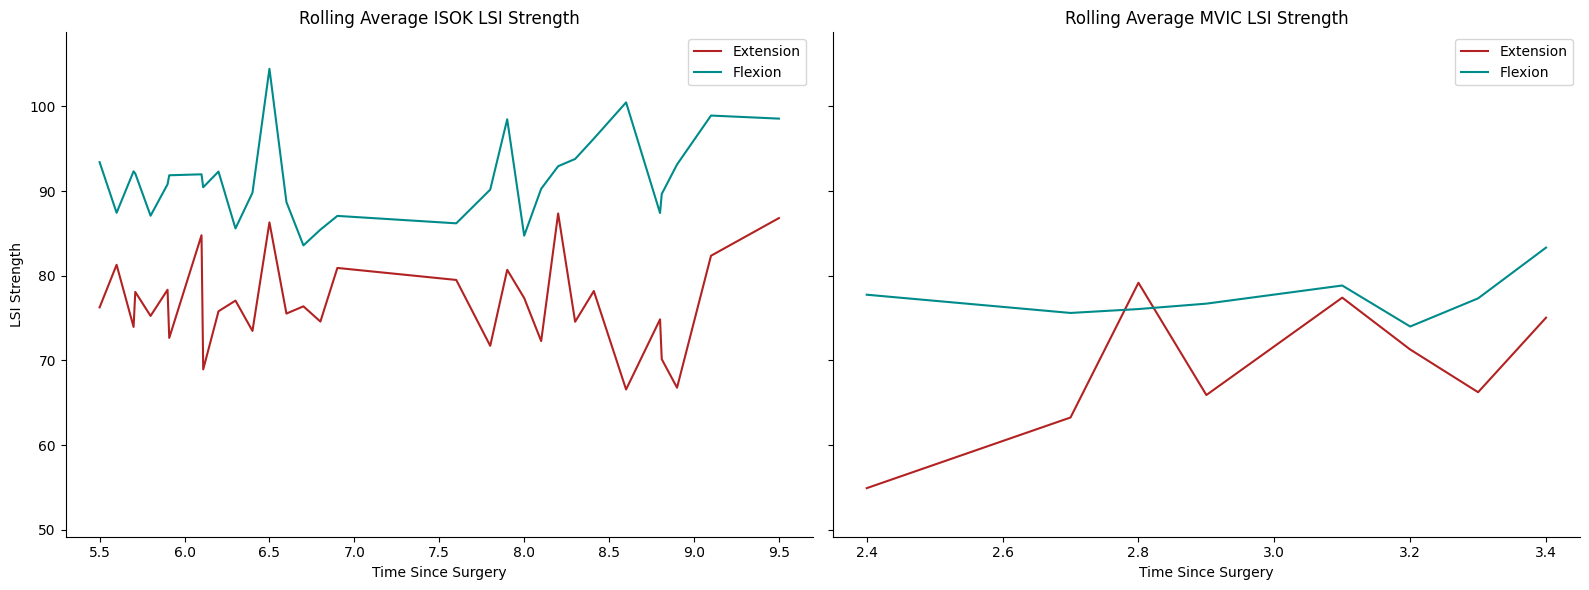

In [67]:
aclr = aclr.sort_values('tss')

aclr['ext_rolling'] = aclr['lsi_ext_isok_60'].rolling(window=12).mean()
aclr['flex_rolling'] = aclr['lsi_flex_isok_60'].rolling(window=12).mean()
aclr['ext_rolling_m'] = aclr['lsi_ext_mvic_60'].rolling(window=8).mean()
aclr['flex_rolling_m'] = aclr['lsi_flex_mvic_60'].rolling(window=8).mean()

all_vals = pd.concat([
    aclr['ext_rolling'], aclr['flex_rolling'],
    aclr['ext_rolling_m'], aclr['flex_rolling_m']
])
ymin, ymax = all_vals.min(), all_vals.max()

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

sns.lineplot(ax=axes[0], data=aclr, x='tss', y='ext_rolling', color='firebrick', label='Extension', errorbar=None)
sns.lineplot(ax=axes[0], data=aclr, x='tss', y='flex_rolling', color='darkcyan', label='Flexion', errorbar=None)
axes[0].set_title('Rolling Average ISOK LSI Strength')
axes[0].set_xlabel('Time Since Surgery')
axes[0].set_ylabel('LSI Strength')
axes[0].set_ylim(ymin, ymax)
axes[0].legend()
sns.despine(ax=axes[0])

sns.lineplot(ax=axes[1], data=aclr, x='tss', y='ext_rolling_m', color='firebrick', label='Extension', errorbar=None)
sns.lineplot(ax=axes[1], data=aclr, x='tss', y='flex_rolling_m', color='darkcyan', label='Flexion', errorbar=None)
axes[1].set_title('Rolling Average MVIC LSI Strength')
axes[1].set_xlabel('Time Since Surgery')
axes[1].set_ylim(ymin, ymax)
axes[1].legend()
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()